I got all 5-letter words from the dictionary file:

`% cat /usr/share/dict/words| grep "^.....$" > words.txt`

Let's see how often each letter appears in 5-letter words:

In [1]:
file = open("words.txt", "r")
letters = dict.fromkeys(list('abcdefghijklmnopqrstuvwxyz'),0)
words = []

for line in file:
    words.append(line.strip().lower())
    chars = set(words[-1])
    for ch in chars:
        letters[ch] += 1
        
# let's sort by frequency in descending order
letters = dict(sorted(letters.items(), key=lambda item: -item[1]))
print(letters)

{'a': 4932, 'e': 4207, 'r': 3356, 'i': 3120, 'o': 2949, 's': 2675, 'l': 2580, 'n': 2573, 't': 2507, 'u': 2207, 'y': 1823, 'c': 1733, 'd': 1572, 'h': 1545, 'm': 1544, 'p': 1389, 'b': 1270, 'g': 1218, 'k': 1043, 'w': 740, 'f': 655, 'v': 526, 'z': 283, 'j': 245, 'x': 238, 'q': 98}


And in the chart:

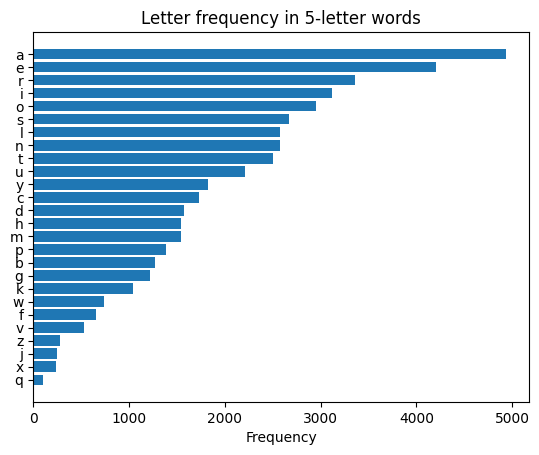

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(letters))

ax.barh(y_pos, letters.values(), height=0.8, align='center')
ax.set_yticks(y_pos, labels=letters.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')
ax.set_title('Letter frequency in 5-letter words')

plt.show()

We need to find the word where most frequent letters appear only once. For that let's pick first 5 of them.

In [4]:
def get_best_words(chars):
    chars = set(chars)
    
    result = []
    
    for word in words:
        word_chars = set(word)
        if len(word_chars) < 5:
            continue
            
        if len(word_chars - chars) == 0:
            result.append(word)
    return result

sorted_chars = list(letters.keys())
print("Letters in sorted order: " + str(sorted_chars))
print("Words with most frequent letters: " + str(get_best_words(sorted_chars[0:6])))

Letters in sorted order: ['a', 'e', 'r', 'i', 'o', 's', 'l', 'n', 't', 'u', 'y', 'c', 'd', 'h', 'm', 'p', 'b', 'g', 'k', 'w', 'f', 'v', 'z', 'j', 'x', 'q']
Words with most frequent letters: ['aries', 'arise', 'arose', 'oreas', 'orias', 'osier', 'raise', 'serai', 'serio']


So word "arise" or any anagram word with the same letters are the best one.
Why not **"arose"**? Because letter "i" is more frequent than "o".
Let's see how many letters we can catch with this word.

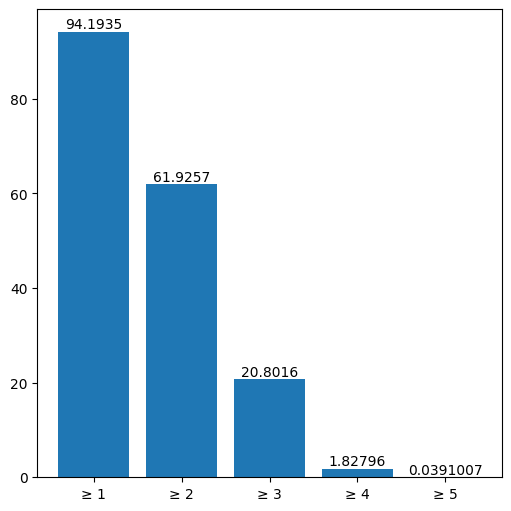

In [5]:
def draw_cumulative_barchart(best_string):
    best_chars = set(best_string)
    num_found_letters = [0] * 6

    for word in words:
        word_chars = set(word)
        letters_overlapped = best_chars & word_chars

        num_found_letters[len(letters_overlapped)] += 1

    cumulative = [0] * 6
    for i in reversed(range(6)):
        if i == 5:
            cumulative[i] = num_found_letters[i]
        else:
            cumulative[i] = cumulative[i + 1] + num_found_letters[i]

    cumulative = np.array(cumulative) * 100 / len(words)
    indices = ['≥ 1', '≥ 2', '≥ 3', '≥ 4', '≥ 5']

    fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

    ax.bar(indices, cumulative[1:6])
    ax.bar_label(ax.containers[0])
    
draw_cumulative_barchart('arise')

In [6]:
print("Words with most frequent letters: " + str(get_best_words(['o', 'l', 'n', 't', 'u', 'y', 'c'])))

Words with most frequent letters: ['clout', 'count', 'cyton', 'louty', 'octyl', 'outly', 'uncoy']


With the same logic as above, **"clout"** is the best word.
And here is the cumulative statistics:

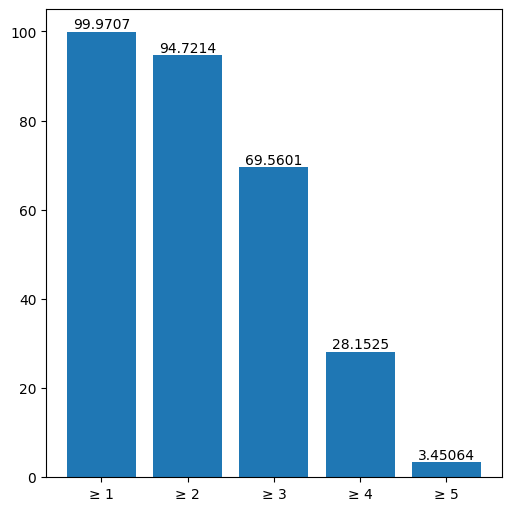

In [7]:
draw_cumulative_barchart('arise' + 'clout')

So next time when you are playing Wordle, you can go with **"arise"** and **"clout"**, and be pretty sure that at least 1 letter would match.

Although it sounds like optimal solution, it is not for the following reasons:
- It looks like some words aren't found in Wordle dictionary like 'louty', 'outly'. This means 2 doctionaries have different set of words.
- Getting words with most frequent letters may not give the best result. Imagine if those frequent letters appear mostly for the same set of words but less frequent ones appear in other words.